# Importing the Data Set

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import warnings
warnings.filterwarnings("ignore")



# Importing the Data

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission_df = pd.read_csv("gender_submission.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 1: Understand your data

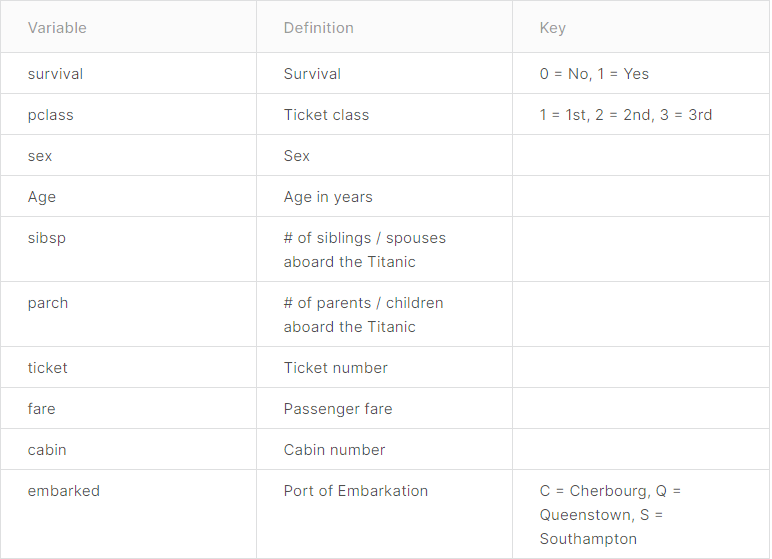

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Identifying Missing Values

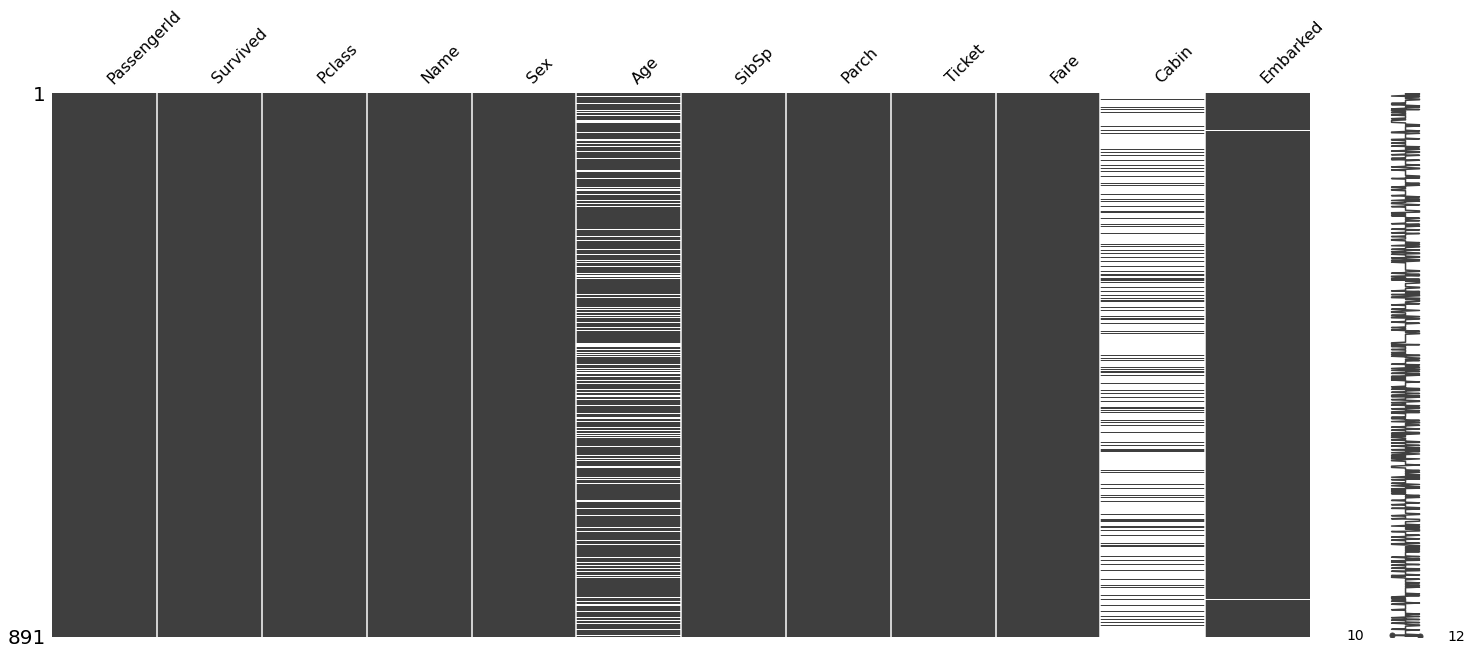

In [5]:
# Plotting graph of missing values
missingno.matrix(train_df)

In [6]:
# Proportion of NAN values in Age column
display(int(train_df["Age"].isnull().sum()) / len(train_df["Age"]) * 100)

# Proportion of NAN values in Cabin column
display(int(train_df["Cabin"].isnull().sum()) / len(train_df["Cabin"]) * 100)

# Proportion of NAN values in Embarked column
display(int(train_df["Embarked"].isnull().sum()) / len(train_df["Embarked"]) * 100)

# Consider droppping the Cabin column altogether, since 77% is missing

19.865319865319865

77.10437710437711

0.22446689113355783

# Further Data Analysis
## Splitting into two sub data frames
- One for discretized continuous variables
    - This means that the continuous variable are split into bins
- One for continuous variables

In [7]:
df_dcv = pd.DataFrame()
df_con = pd.DataFrame()

# I'm not 100% what this is for just yet

# Exploring Feature by Feature

## Target Feature: Survived

0    549
1    342
Name: Survived, dtype: int64

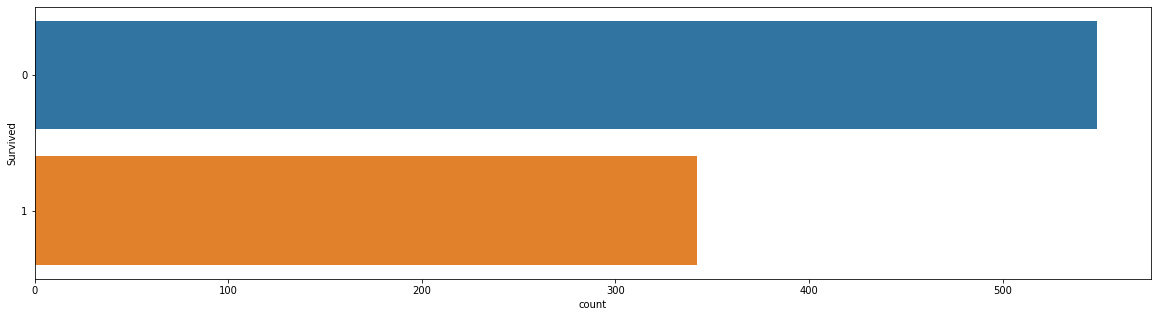

In [8]:
# How many people survived?

fig = plt.figure(figsize = (20, 5))
sns.countplot(y = "Survived", data = train_df)
display(train_df["Survived"].value_counts())

# Number of people who did not survive greatly outnumber the number of people who did survive

In [9]:
# Adding the Survived column into the sub data sets
df_dcv["Survived"] = train_df["Survived"]
df_con["Survived"] = train_df["Survived"]

## Target Feature: Pclass

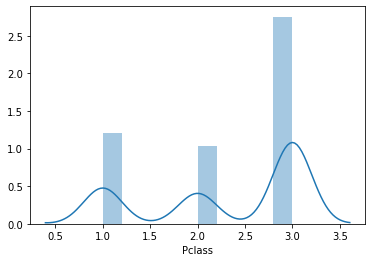

In [11]:
sns.distplot(train_df["Pclass"])

# This feature is both numerical and categorical

In [12]:
# Adding Pclass column into sub data sets
df_dcv["Pclass"] = train_df["Pclass"]
df_con["Pclass"] = train_df["Pclass"]

## Target Feature: Name

In [18]:
# How many different names?

display(train_df["Name"].value_counts())
train_df["Name"].duplicated().any()

Andersson, Master. Sigvard Harald Elias                 1
Gee, Mr. Arthur H                                       1
Hunt, Mr. George Henry                                  1
Leinonen, Mr. Antti Gustaf                              1
Albimona, Mr. Nassef Cassem                             1
                                                       ..
Widegren, Mr. Carl/Charles Peter                        1
McMahon, Mr. Martin                                     1
Collyer, Mrs. Harvey (Charlotte Annie Tate)             1
Sage, Miss. Constance Gladys                            1
Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)    1
Name: Name, Length: 891, dtype: int64

False

### Subtask: Convert the names into variables depending on whether their title is "Mr.", "Ms." or "Mrs."

"Mr." = 0 

"Ms." = 1

"Mrs." = 2



In [55]:
def gender_label(array_item):
    if "Mr." in array_item or "Mr" in array_item or "Master." in array_item or "Rev." in array_item:
        return 0
    elif "Ms." in array_item or "Miss." in array_item or "Miss" in array_item:
        return 1
    elif "Mrs." in array_item or "Mrs" in array_item:
        return 2
    
train_df["Name_Label"] = train_df["Name"].apply(gender_label)

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0


In [56]:
# Checking for the nature of Nan values in Name_Label and adjusting the condition in the previous cell

train_df[train_df["Name_Label"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Label
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,NaN
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,NaN
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,NaN
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,NaN
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,NaN
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,NaN
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,NaN
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,NaN
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,NaN
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,NaN


In [59]:
# Adding the Name_label column to the sub data sets
df_dcv["Name_Label"] = train_df["Name_Label"]
df_con["Name_Label"] = train_df["Name_Label"]

## Target Feature: Sex

male      577
female    314
Name: Sex, dtype: int64

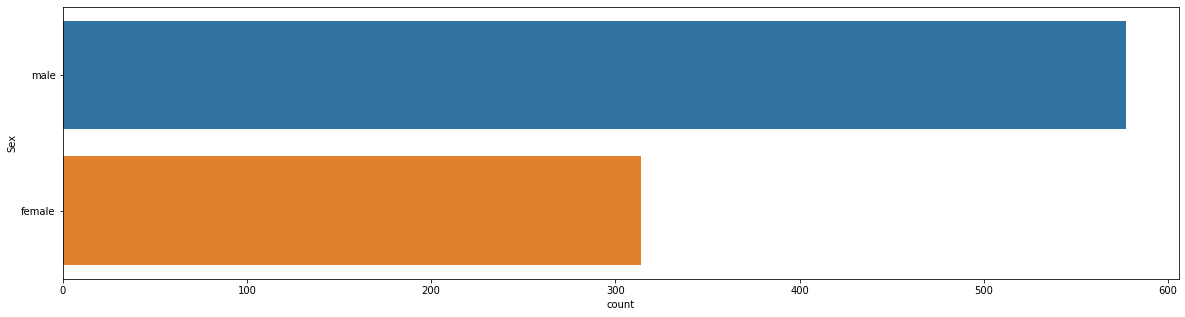

In [60]:
# Comparing number of males to number of females

fig = plt.figure(figsize = (20, 5))
sns.countplot(y = "Sex", data = train_df)
display(train_df["Sex"].value_counts())

In [63]:
# Exploring the Sex column
train_df["Sex"].isnull().any() # No missing values

False

In [64]:
# Adding the Sex column into the sub data sets
df_dcv["Sex"] = train_df["Sex"]

df_dcv["Sex"] = np.where(df_dcv["Sex"] == "female", 1, 0) # This converts the value to 1 where it is female, 0 where it is mal

df_con["Sex"] = train_df["Sex"]


## Subtask: Comparing Sex variable to the Survived variable
Easy to execute because both variables are binary in nature